<a name=funcion_de_costo></a>

En regresion logistica, tenemos que utilizar una ***funcion de perdida*** diferente, ya que si utilizamos la misma que en la regresion lineal (el error cuadrado minimo) no obtenemos un ***minimo global***, que es necesario para que funcione correctamente el ***descenso por gradiente***.

En este caso, aplicamos la funcion ***entropia cruzada***, o ***log-loss***:

\begin{equation}
L(y^{(i)}, \hat y^{(i)}) = -[y log(\hat y) + (1 - y)  log(1 - \hat y)]
\end{equation}

Y aplicado a todos nuestros datos, con sumatoria:
\begin{equation}
J(y, \hat y) = -\frac{1}{m}\sum_{i=1}^m [y^{(i)} log(\hat y^{(i)}) + (1 - y^{(i)})  log(1 - \hat y^{(i)})]
\end{equation}

Para entender esta atrocidad, veamos como viene la mano con el logaritmo ...

<img src='./Representación-gráfica-del-logaritmo-natural-1.jpg'></img>

De todo esto, recordemos que nosotros estamos lidiando ***solamente*** con valores de 0 a 1. Entonces, el logaritmo de un numero cercano a uno sera $\approx$ 0. El logaritmo de un numero cercano a cero sera $\approx$   $- \infty$

1. $y^{(i)} log(\hat y^{(i)})$: Cuando la etiqueta verdadera $y^{(i)}$ es 1 (es decir, la observación pertenece a la clase positiva), solo importa esta parte de la suma. Si nuestra predicción $\hat y^{(i)}$ también es cercana a 1, el logaritmo de un número cercano a 1 es aproximadamente 0, lo que significa que el coste es bajo. Por otro lado, si $\hat y^{(i)}$ es cercano a 0 (es decir, nuestra predicción estaba totalmente equivocada), el logaritmo de un número cercano a 0 se dispara hacia el infinito negativo, lo que significa que nuestro coste será muy alto.

2. $(1 - y^{(i)}) log(1 - \hat y^{(i)})$: Esto es análogo, pero para el caso en que la etiqueta verdadera $y^{(i)}$ es 0 (es decir, la observación pertenece a la clase negativa).

Entonces, la elección de tomar el logaritmo en esta ecuación tiene la intención de castigar muy fuertemente las predicciones incorrectas. Si nuestra predicción está muy lejos del valor verdadero, la función de coste se disparará. Por otro lado, si nuestra predicción es correcta, el término del logaritmo se acerca a cero, lo que indica un bajo coste.


- Pero no se asusten, esta excelentemente explicado en este video, si saben un poco de ingles: [Andrew Ng](https://www.youtube.com/watch?v=SHEPb1JHw5o)
- Lo mas importante es recordar que son funciones de costo diferentes, adaptadas al problema a resolver.

Intercepto (β0): 2.1316282072803006e-14
coeficiente de regresion (β1): 0.11999999999999994
Prediccion de ventas para $1000 en publicidad: 119.99999999999997 productos


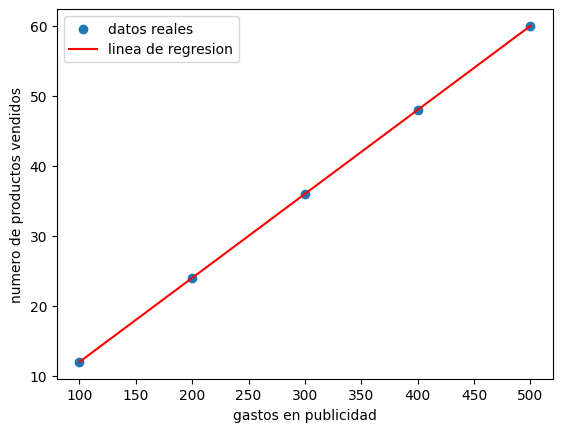

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#datos de ejemplo: Gasto en publicidad en linea y numero de productos vendidos

gasto_publicidad = np.array([100,200,300,400,500])
productos_vendidos = np.array([12,24,36,48,60])

#crear el modelo de regresion lineal
modelo = LinearRegression()

# entrenar modelo de RL
modelo.fit(gasto_publicidad.reshape(-1,1),productos_vendidos)

#hacer la prediccion
nuevo_gasto_publicidad = 1000 #nuevo gasto de publicidad
prediccion = modelo.predict(np.array([[nuevo_gasto_publicidad]]))

#imprimir parametros de modelo

print(f"Intercepto (β0): {modelo.intercept_}")
print(f"coeficiente de regresion (β1): {modelo.coef_[0]}")

#imprimir prediccion
print(f"Prediccion de ventas para ${nuevo_gasto_publicidad} en publicidad: {prediccion[0]} productos")

#graficos
plt.scatter(gasto_publicidad,productos_vendidos, label= "datos reales" )
plt.plot(gasto_publicidad, modelo.predict(gasto_publicidad.reshape(-1,1)),color="red",label="linea de regresion")
plt.xlabel("gastos en publicidad")
plt.ylabel("numero de productos vendidos")
plt.legend()
plt.show()

Intercepto (β0): 27.413461538461533
coeficiente de regresion (β1): 0.01660256410256411
Prediccion de ventas para $5 en publicidad: 27.496474358974353 productos


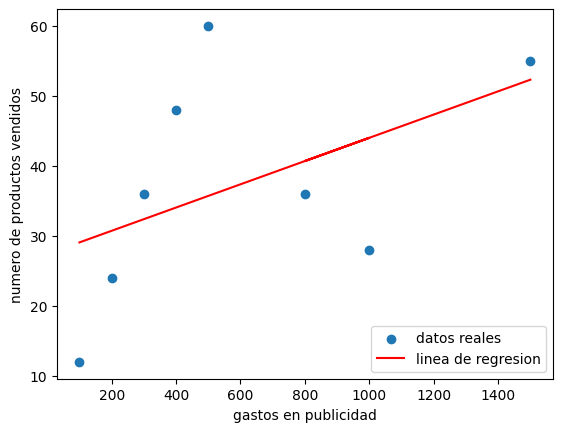

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

#datos de ejemplo: Gasto en publicidad en linea y numero de productos vendidos

gasto_publicidad = np.array([100,200,300,400,500,1000,800,1500])
productos_vendidos = np.array([12,24,36,48,60,28,36,55])

#crear el modelo de regresion lineal
modelo = LinearRegression()

# entrenar modelo de RL
modelo.fit(gasto_publicidad.reshape(-1,1),productos_vendidos)

#hacer la prediccion
nuevo_gasto_publicidad = int(input("ingrese el costo de publicidad nueva: ")) #nuevo gasto de publicidad
prediccion = modelo.predict(np.array([[nuevo_gasto_publicidad]]))

#imprimir parametros de modelo

print(f"Intercepto (β0): {modelo.intercept_}")
print(f"coeficiente de regresion (β1): {modelo.coef_[0]}")

#imprimir prediccion
print(f"Prediccion de ventas para ${nuevo_gasto_publicidad} en publicidad: {prediccion[0]} productos")

#graficos
plt.scatter(gasto_publicidad,productos_vendidos, label= "datos reales" )
plt.plot(gasto_publicidad, modelo.predict(gasto_publicidad.reshape(-1,1)),color="red",label="linea de regresion")
plt.xlabel("gastos en publicidad")
plt.ylabel("numero de productos vendidos")
plt.legend()
plt.show()

probabilidad de exito para $5 en publicidad: 0.30


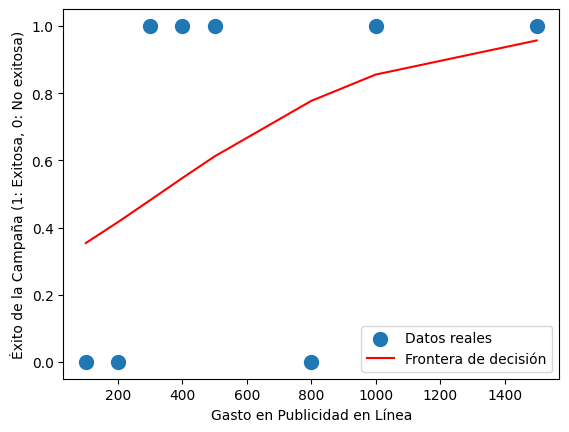

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

# datos de ejemplo: gasto de plucidad y  si un campaña fue exitosa o no (0: no exitosa, 1:exitosa)
gasto_publicidad = np.array([100,200,300,400,500,800,1000,1500])
exitosa=np.array([0,0,1,1,1,0,1,1])

#crear el modelo de Regresion Logistica
modelo=LogisticRegression(solver="lbfgs")

#entrenar el modelo
modelo.fit(gasto_publicidad.reshape(-1,1),exitosa)

#hacer la prediccion
gasto_nuevo=int(input("ingrese el costo de la nueva publicidad: "))
probabilidad_exitosa = modelo.predict_proba(np.array([[gasto_nuevo]]))[:, 1]

#imprimir la probabilidad de exito
print(f"probabilidad de exito para ${gasto_nuevo} en publicidad: {probabilidad_exitosa[0]:.2f}")

#graficos
plt.scatter(gasto_publicidad, exitosa, label='Datos reales', marker='o', s=100)
plt.plot(gasto_publicidad, modelo.predict_proba(gasto_publicidad.reshape(-1, 1))[:, 1], color='red', label='Frontera de decisión')
plt.xlabel('Gasto en Publicidad en Línea')
plt.ylabel('Éxito de la Campaña (1: Exitosa, 0: No exitosa)')
plt.legend()
plt.show()



Probabilidad de éxito para $350000 en publicidad en línea: 1.00


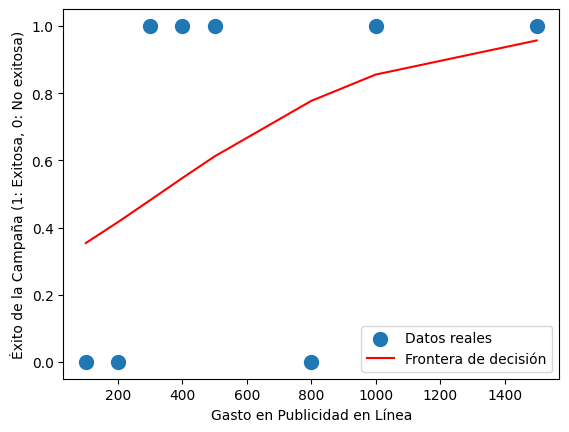

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression


gasto_publicidad = np.array([100, 200, 300, 400, 500, 800, 1000, 1500])
exitosa = np.array([0, 0, 1, 1, 1, 0, 1, 1])


modelo = LogisticRegression(solver='lbfgs')


modelo.fit(gasto_publicidad.reshape(-1, 1), exitosa)


gasto_nuevo = 350000  # Nuevo gasto en publicidad en línea
probabilidad_exitosa = modelo.predict_proba(np.array([[gasto_nuevo]]))[:, 1]

print(f"Probabilidad de éxito para ${gasto_nuevo} en publicidad en línea: {probabilidad_exitosa[0]:.2f}")


plt.scatter(gasto_publicidad, exitosa, label='Datos reales', marker='o', s=100)
plt.plot(gasto_publicidad, modelo.predict_proba(gasto_publicidad.reshape(-1, 1))[:, 1], color='red', label='Frontera de decisión')
plt.xlabel('Gasto en Publicidad en Línea')
plt.ylabel('Éxito de la Campaña (1: Exitosa, 0: No exitosa)')
plt.legend()
plt.show()